In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets # New
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
### ----------------------
### global variables
### ----------------------

import random

RANDOM_STATE = 24
rng = np.random.default_rng(seed = RANDOM_STATE)


TEST_SIZE = 0.2
N_SAMPLE = 1000
ALPHA = 0.1 # LEARNING RATE
NOISE = 0.2
EPOCHS = 20000  # NUMBER OF ITERATIONS

# input and output directories
inpDir = '../../input'
outDir = '../output'

params = {
    'legend.fontsize': 'medium',
    'figure.figsize': (10, 6),
    'axes.labelsize': 'medium',
    'axes.titlesize':'large',
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium'
}

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')

In [3]:
# Loading Dataset

x, y = datasets.make_moons(n_samples = N_SAMPLE, # number of datapoints
                           noise = NOISE,   # Mixing
                           shuffle = True,   # shuffleing
                           random_state = RANDOM_STATE)

x.shape, y.shape

((1000, 2), (1000,))

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    random_state = RANDOM_STATE,
                                                    stratify = y,
                                                    test_size = TEST_SIZE)



In [5]:
def fn_actv(z):
    return np.tanh(z)

def fn_actv_prime(z):
    return 1 - np.tanh(z) ** 2

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
def predict(model, x_p):
        w1, w2, b1, b2 = model["w1"], model["w2"], model["b1"], model["b2"]

        # Layer 1
        z1 = x_p.dot(w1) + b1  # Aggregation funciton
        a1 = fn_actv(z1)       # Activation

        # Layer 2
        z2 = a1.dot(w2) + b2    # Aggregation Fucntio
        a2 = sigmoid(z2)        # Activation

        return a2 > 0.5

In [8]:
def fn_calculate_loss(model, x_l, y_l):
        w1, w2, b1, b2 = model["w1"], model["w2"], model["b1"], model["b2"]
        m = x_l.shape[0]
        # Layer 1
        z1 = x_l.dot(w1) + b1  # Aggregation funciton
        a1 = fn_actv(z1)       # Activation

        # Layer 2
        z2 = a1.dot(w2) + b2    # Aggregation Fucntio
        a2 = sigmoid(z2)        # Activation

        data_loss = -y_l * np.log(a2)

        return data_loss.sum() / m

In [9]:
y_train = y_train.reshape(-1, 1)
y_train.shape

(800, 1)

In [10]:
def build_model(nn_hdim, x_t, y_t, n_epochs = EPOCHS, alpha = ALPHA):
    """
    2 - 4 - 1
    """
    # print(y_t.shape)
    m, nn_input_dim = x_t.shape
    nn_output_shape = y_t.shape[1]

    w1 = rng.random((nn_input_dim, nn_hdim), dtype = np.float32) / np.sqrt(nn_input_dim)
    w2 = rng.random((nn_hdim, nn_output_shape), dtype = np.float32) / np.sqrt(nn_hdim)

    b1 = np.zeros((1, nn_hdim), dtype = np.float32)
    b2 = np.zeros((1, nn_output_shape), dtype = np.float32)

    curr_loss = 0
    loss = []
    epoch = []

    for i in range(n_epochs):

        # Forward Propogation

        # Layer 1
        z1 = x_t.dot(w1) + b1  # Aggregation funciton
        a1 = fn_actv(z1)       # Activation

        # Layer 2
        z2 = a1.dot(w2) + b2    # Aggregation Fucntio
        a2 = sigmoid(z2)        # Activation


        # Back propogation

        dz2 = a2 - y_t # y should be of shape (1, m)
        dw2 = (a1.T).dot(dz2)
        assert (w2.shape == dw2.shape), f"Shape: w2:{w2.shape} and dw2:{dw2.shape}"

        db2 = np.sum(dz2, axis = 0, keepdims = True)

        assert (b2.shape == db2.shape), f"Shape: b2:{b2.shape} and db2:{db2.shape}"

        da1 = dz2.dot(w2.T)
        assert(a1.shape == da1.shape), f"Shape: a1:{a1.shape} and da1:{da1.shape}"

        # Layer 1

        dz1 = da1 * fn_actv_prime(z1)
        assert(z1.shape == dz1.shape), f"Shape: z1:{z1.shape} and dz1:{dz1.shape}"

        dw1 = (x_t.T).dot(dz1)
        assert(w1.shape == dw1.shape), f"Shape: w1:{w1.shape} and dw1:{dw1.shape}"

        db1 = np.sum(dz1, axis = 0, keepdims = True)
        assert(b1.shape == db1.shape), f"Shape: b1:{b1.shape} and db1:{db1.shape}"

        ## Gradient Update

        w1 += -alpha * dw1 / m
        w2 += -alpha * dw2 / m
        b1 += -alpha * db1 / m
        b2 += -alpha * db2 / m

        model = {"w1": w1,  "b1": b1, "w2": w2, "b2": b2}

        if i % 100 == 0:
            curr_loss = fn_calculate_loss(model, x_t, y_t)
            loss.append(curr_loss)
            epoch.append(i)

        if i % 1000 == 0:
            print(f"Loss after {i:>5d} epochs: {curr_loss:0.5f}")

        loss_hist["epoch"] = epoch
        loss_hist["loss"] = loss

        # print(w1.shape, w2.shape, b1.shape, b2.shape)

    return model






In [11]:
loss_hist = {}

In [12]:

model = build_model(50, x_train, y_train, alpha = 0.001)


Loss after     0 epochs: 0.21789
Loss after  1000 epochs: 0.27317
Loss after  2000 epochs: 0.26759
Loss after  3000 epochs: 0.24687
Loss after  4000 epochs: 0.22707
Loss after  5000 epochs: 0.21104
Loss after  6000 epochs: 0.19865
Loss after  7000 epochs: 0.18916
Loss after  8000 epochs: 0.18183
Loss after  9000 epochs: 0.17609
Loss after 10000 epochs: 0.17154
Loss after 11000 epochs: 0.16785
Loss after 12000 epochs: 0.16484
Loss after 13000 epochs: 0.16234
Loss after 14000 epochs: 0.16025
Loss after 15000 epochs: 0.15849
Loss after 16000 epochs: 0.15699
Loss after 17000 epochs: 0.15571
Loss after 18000 epochs: 0.15461
Loss after 19000 epochs: 0.15366


In [13]:
y_train_pred = predict(model, x_train)
accuracy_score(y_true= y_train, y_pred = y_train_pred)

0.875

In [14]:
y_test_pred = predict(model, x_test)
accuracy_score(y_test, y_test_pred)

0.85

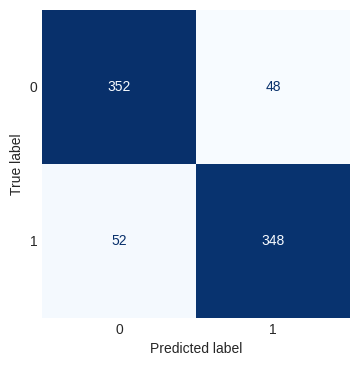

In [15]:
cm = confusion_matrix(y_true = y_train, y_pred = y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= [0, 1])
fig, ax = plt.subplots(figsize = (4,4))
disp.plot(ax = ax, cmap = "Blues", colorbar = False)
ax.grid(False)

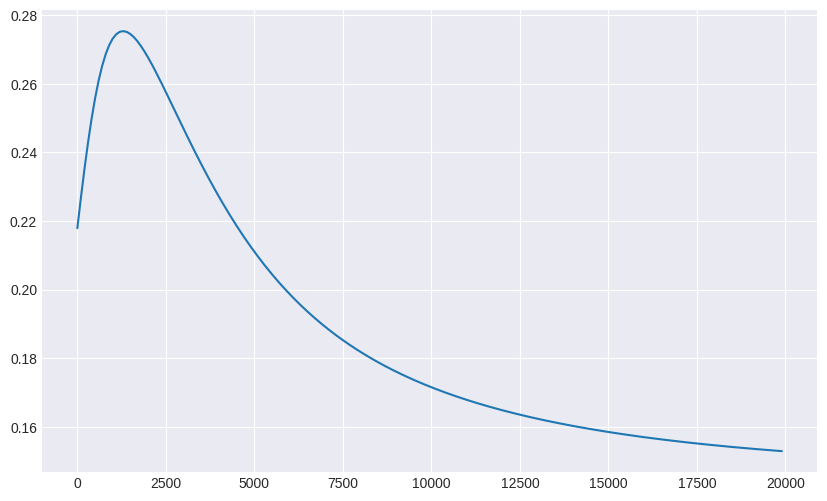

In [16]:
loss_curve_df = pd.DataFrame(loss_hist)
loss_curve_df
plt.plot(loss_curve_df["epoch"], loss_curve_df["loss"])

In [17]:
def fn_plot_decision_boundary(model, x_tr, y_tr, x_ts, y_ts):

    fig, ax = plt.subplots(figsize = (15, 8))

    dm = 0.05

    x_min, x_max = x_tr[:, 0].min(), x_tr[:, 0].max()
    y_min, y_max = x_tr[:, 1].min(), x_tr[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))

    XX = np.c_[xx.ravel(), yy.ravel()]

    # XX = np.hstack((XX, np.ones((XX.shape[0], 1)))

    y_pred = predict(model, XX)

    # for row in XX:
    #     y_p = predict(row, wgts)
    #     # pred = 1
    #     # if y_p < 0:
    #     #     pred = 0
    #     y_pred.append(0 if y_p < 0.5 else 1)

    Z = np.array(y_pred).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha = 0.8, cmap = plt.cm.Paired)

    ax.scatter(x_tr[:, 0], x_tr[:, 1], c = y_tr, edgecolor = "k", cmap = CMAP)
    ax.scatter(x_ts[:, 0], x_ts[:, 1], c = y_ts, edgecolor = "k", cmap = CMAP, marker = "*")




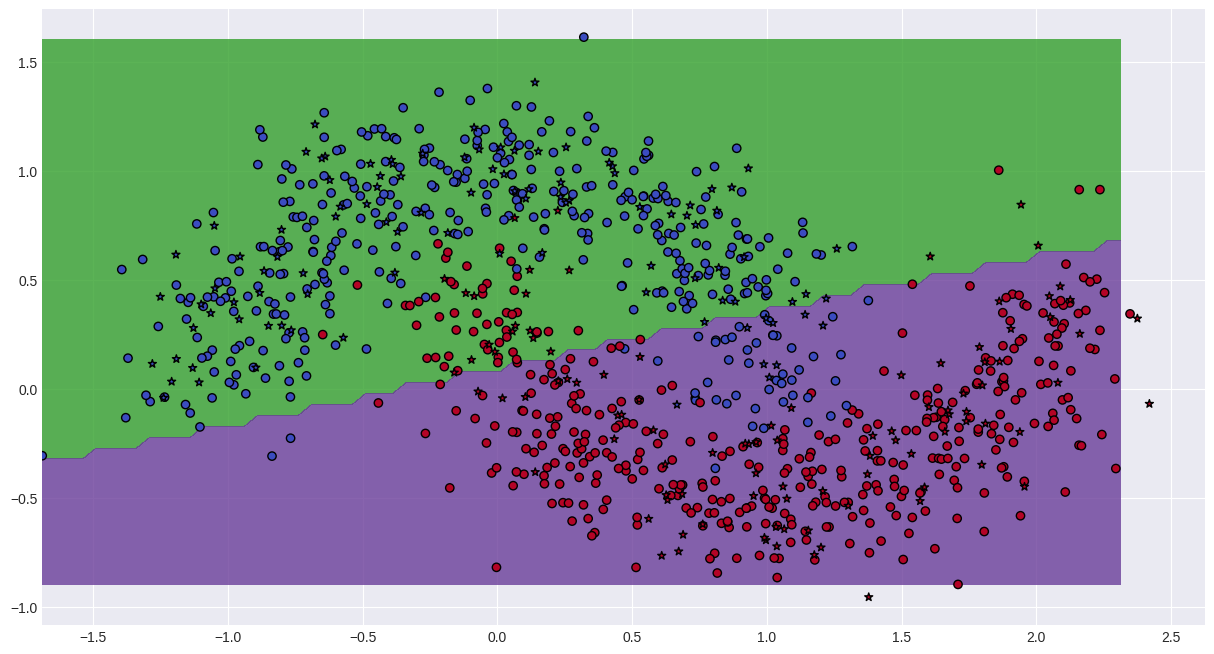

In [18]:
fn_plot_decision_boundary(model, x_train, y_train, x_test, y_test)